## Import Packages

In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

In [3]:
import xgboost as xgb

C:\Anaconda\envs\Data-X\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import data

In [4]:
data = pd.read_csv('founder_V0.3_founder.csv')

In [5]:
# Replace detailed role variable with binary variable
data['Primary Job Title'] = data['Founder']

In [6]:
# Drop variables not to be used in our models
data = data.drop(['Full Name','Bio','Founder'], axis=1)

In [7]:
data

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1
5,1,1,15,3,1,1,0,0,0,1,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1
6,1,1,1,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1
7,1,1,1569,2,5,6,0,0,0,7,"Sensor, Smart Home, Manufacturing",California,1,2010,0,1,2,1
8,1,1,310,1,2,2,0,0,0,4,"Sensor, Smart Home, Manufacturing",California,1,2010,0,1,2,1
9,1,1,3669,1,73,101,0,3,17,19,"CRM, Cloud Computing, SaaS, Enterprise Software",California,1,1999,0,1,2,1


In [8]:
#list(data)
data['Gender'] = data['Gender'].astype(int)

In [9]:
data.shape

(18361, 18)

In [10]:
data=data[(data.Gender==2) == False]

In [11]:
data.shape

(18230, 18)

In [12]:
df1 = data['Headquarters Location '].value_counts().reset_index(name='count').rename(columns={'index': 'Headquarters Location '})

In [13]:
data = pd.merge(data,df1,on=['Headquarters Location '], how='left' )

In [14]:
data

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,count
0,0,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
1,1,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,6535
2,1,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1,6535
3,1,1,128,1,6,7,0,0,1,5,"Apps, Enterprise Software, Developer APIs, Fin...",California,1,2006,0,1,2,1,6535
4,1,1,861,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1935
5,1,1,15,3,1,1,0,0,0,1,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1935
6,1,1,1,1,0,0,0,0,0,0,"Internet, Self-Storage, E-Commerce",New York,1,2013,0,0,3,1,1935
7,1,1,1569,2,5,6,0,0,0,7,"Sensor, Smart Home, Manufacturing",California,1,2010,0,1,2,1,6535
8,1,1,310,1,2,2,0,0,0,4,"Sensor, Smart Home, Manufacturing",California,1,2010,0,1,2,1,6535
9,1,1,3669,1,73,101,0,3,17,19,"CRM, Cloud Computing, SaaS, Enterprise Software",California,1,1999,0,1,2,1,6535


In [15]:
data['Headquarters Location '] = data['count']

In [16]:
data = data.drop(['count'], axis=1)

data = data.drop(['Categories','Closed Date'], axis=1)

In [17]:
data

,Primary Job Title,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Headquarters Location,Operating Status,Founded Date,Company Type,Number of Founders,Success
0,0,1,14445,7,11,21,0,9,6,2,6535,1,2003,1,4,1
1,1,1,100,2,1,1,0,0,0,1,6535,1,2003,1,4,1
2,1,1,19678,10,6,7,0,0,0,5,6535,1,2004,1,5,1
3,1,1,128,1,6,7,0,0,1,5,6535,1,2006,1,2,1
4,1,1,861,1,0,0,0,0,0,0,1935,1,2013,0,3,1
5,1,1,15,3,1,1,0,0,0,1,1935,1,2013,0,3,1
6,1,1,1,1,0,0,0,0,0,0,1935,1,2013,0,3,1
7,1,1,1569,2,5,6,0,0,0,7,6535,1,2010,1,2,1
8,1,1,310,1,2,2,0,0,0,4,6535,1,2010,1,2,1
9,1,1,3669,1,73,101,0,3,17,19,6535,1,1999,1,2,1


## Normalization

We divide every numerical variable by the maximum value it may take to nomalize them between 0 and 1

In [18]:
data['Number of News Articles'] = data['Number of News Articles']/data['Number of News Articles'].max()

In [19]:
data['Number of Founded Organizations'] = data['Number of Founded Organizations']/data['Number of Founded Organizations'].max()

In [20]:
data['Number of Portfolio Companies'] = data['Number of Portfolio Companies']/data['Number of Portfolio Companies'].max()

In [21]:
data['Number of Investments_x'] = data['Number of Investments_x']/data['Number of Investments_x'].max()

In [22]:
data['Number of Partner Investments'] = data['Number of Partner Investments']/data['Number of Partner Investments'].max()

In [23]:
data['Number of Lead Investments_x'] = data['Number of Lead Investments_x']/data['Number of Lead Investments_x'].max()

In [24]:
data['Number of Exits_x'] = data['Number of Exits_x']/data['Number of Exits_x'].max()

In [25]:
data['Number of Events_x'] = data['Number of Events_x']/data['Number of Events_x'].max()

In [26]:
data['Number of Founders'] = data['Number of Founders']/data['Number of Founders'].max()

In [27]:
data['Headquarters Location '] = data['Headquarters Location ']/data['Headquarters Location '].max()

In [28]:
from sklearn.model_selection import train_test_split

X_data2 = data.iloc[:,:-1] 
Y_data2 = data['Success'] 
    
print("Feature vector shape=", X_data2.shape)
print("Class shape=", Y_data2.shape)

Feature vector shape= (18230, 15)
Class shape= (18230,)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_data2, Y_data2, test_size = 0.2 , random_state=100)

## Models

### XGBoost

In [30]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=10000)
gradboost.fit(x_train, y_train)
y_pred_xgb = gradboost.predict(x_test)

acc_gradboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_gradboost_train)

acc_gradboost_test = round(gradboost.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_gradboost_test)

Train accuracy:  83.82
Test accuracy:  76.88


Average precision-recall score: 0.76


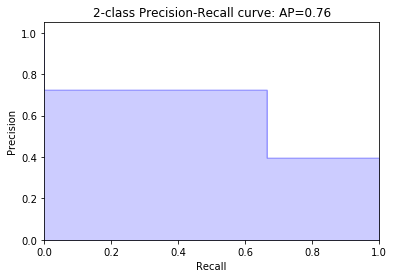

In [31]:
# Calculate and plot average precision recall score

from sklearn.metrics import average_precision_score
y_pred = y_pred_xgb
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [ ]:
# Attempt at ROC Curve

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


X = data.iloc[:,:-1] 
y = data['Success'] 

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Plot ROC curve

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

In [ ]:
# Calculate and plot average precision recall score

y_pred = y_pred_rnf
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [ ]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(random_forest, x_train, y_train)

### Logistic Regression

In [81]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  60.98
Test accuracy:  61.11


Average precision-recall score: 0.50


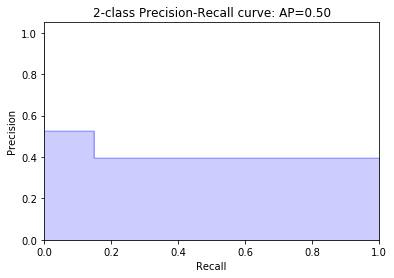

In [111]:
# Calculate and plot average precision recall score

y_pred = y_pred_log
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### Support Vector Machines

In [90]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)

acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_svc_train)

acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  74.47
Test accuracy:  74.85


Average precision-recall score: 0.74


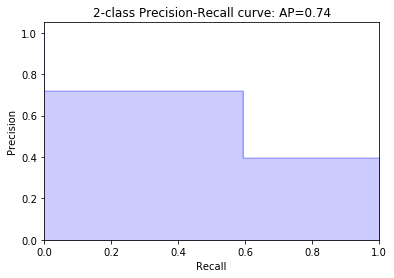

In [112]:
# Calculate and plot average precision recall score

y_pred = y_pred_svm
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

### kNN

In [92]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print('Training accuracy for kNN: ',acc_knn)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Test accuracy for kNN: ',acc_knn)

Training accuracy for kNN:  83.74
Test accuracy for kNN:  72.71


Average precision-recall score: 0.72


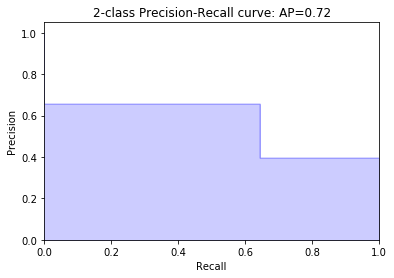

In [93]:
# Calculate and plot average precision recal score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

# Alternative approach

In [6]:
data = pd.read_csv('founder_V0.3_founder.csv')

In [7]:
# Replace detailed role variable with binary variable

data['Primary Job Title'] = data['Founder']

In [8]:
# Drop variables not to be used in our models

data = data.drop(['Full Name','Bio','Founder'], axis=1)

In [10]:
# Encode multivalue categorical variables to unique integers

from sklearn import preprocessing 

HQ = preprocessing.LabelEncoder()
#to convert into numbers
data['Headquarters Location '] = HQ.fit_transform(data['Headquarters Location '])

CAT = preprocessing.LabelEncoder()
#to convert into numbers
data['Categories'] = CAT.fit_transform(data['Categories'])

In [12]:
# Normalize variables

data['Number of News Articles'] = data['Number of News Articles']/data['Number of News Articles'].max()

data['Number of Founded Organizations'] = data['Number of Founded Organizations']/data['Number of Founded Organizations'].max()

data['Number of Portfolio Companies'] = data['Number of Portfolio Companies']/data['Number of Portfolio Companies'].max()

data['Number of Investments_x'] = data['Number of Investments_x']/data['Number of Investments_x'].max()

data['Number of Partner Investments'] = data['Number of Partner Investments']/data['Number of Partner Investments'].max()

data['Number of Lead Investments_x'] = data['Number of Lead Investments_x']/data['Number of Lead Investments_x'].max()

data['Number of Exits_x'] = data['Number of Exits_x']/data['Number of Exits_x'].max()

data['Number of Events_x'] = data['Number of Events_x']/data['Number of Events_x'].max()

data['Number of Founders'] = data['Number of Founders']/data['Number of Founders'].max()

data['Headquarters Location '] = data['Headquarters Location ']/data['Headquarters Location '].max()

In [13]:
from sklearn.model_selection import train_test_split

X_data2 = data.iloc[:,:-1] 
Y_data2 = data['Success'] 
    
print("Feature vector shape=", X_data2.shape)
print("Class shape=", Y_data2.shape)

x_train, x_test, y_train, y_test = train_test_split(X_data2, Y_data2, test_size = 0.2 , random_state=100)

Feature vector shape= (18361, 17)
Class shape= (18361,)


In [15]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=10000)
gradboost.fit(x_train, y_train)
y_pred_xgb = gradboost.predict(x_test)

acc_gradboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_gradboost_train)

acc_gradboost_test = round(gradboost.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_gradboost_test)

Train accuracy:  95.6
Test accuracy:  82.98


In [17]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

Train accuracy:  99.96
Test accuracy:  80.32


In [18]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  61.15
Test accuracy:  59.98


In [19]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)

acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_svc_train)

acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  89.37
Test accuracy:  76.69


In [20]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print('Training accuracy for kNN: ',acc_knn)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Test accuracy for kNN: ',acc_knn)

Training accuracy for kNN:  88.91
Test accuracy for kNN:  76.72
